# Argentina


In [1]:
import os
import pandas as pd
import json
import gspread as gs
import warnings

from utils.clean import wrangling
from utils.top_imports import top_importadores
from utils.data_anual import annual_data
from utils.vol_origenes import analisis_origenes

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

warnings.simplefilter("ignore")

                ### ~~~ ###
            ###     PATH     ###
                ### ~~~ ###

location_2013 = "./data/283525_Importaciones_2013.xlsx"
location_2014 = "./data/283525_Importaciones_2014.xlsx"
location_2015 = "./data/283525_Importaciones_2015.xlsx"
location_2016 = "./data/283525_Importaciones_2016.xlsx"
location_2017 = "./data/283525_Importaciones_2017.xlsx"
location_2018 = "./data/283525_Importaciones_2018.xlsx"
location_2019 = "./data/283525_Importaciones_2019.xlsx"
location_2020 = "./data/283525_Importaciones_2020.xlsx"
location_2021 = "./data/283525_Importaciones_2021.xlsx"
location_2022 = "./data/283525_Importaciones_2022.xlsx"
location_2023 = "./data/283525_Importaciones_2023.xlsx"

                ### ~~~ ###
            ###     DATA     ###
                ### ~~~ ###

data2013 = pd.read_excel(location_2013, engine="openpyxl")
data2014 = pd.read_excel(location_2014, engine="openpyxl")
data2015 = pd.read_excel(location_2015, engine="openpyxl")
data2016 = pd.read_excel(location_2016, engine="openpyxl")
data2017 = pd.read_excel(location_2017, engine="openpyxl")
data2018 = pd.read_excel(location_2018, engine="openpyxl")
data2019 = pd.read_excel(location_2019, engine="openpyxl")
data2020 = pd.read_excel(location_2020, engine="openpyxl")
data2021 = pd.read_excel(location_2021, engine="openpyxl")
data2022 = pd.read_excel(location_2022, engine="openpyxl")
data2023 = pd.read_excel(location_2023, engine="openpyxl")


In [2]:
# MERGE
dfs = [data2013, data2014, data2015, data2016, data2017,
       data2018, data2019, data2020, data2021, data2022, data2023]

print("Este df tiene (filas, col):\n___________________")

for df in dfs:
    print(f"> {df['Fecha'][0].year}: {df.shape}\n~~~~~~~~~~~~~~~~~~~")


Este df tiene (filas, col):
___________________
> 2013: (84, 35)
~~~~~~~~~~~~~~~~~~~
> 2014: (99, 35)
~~~~~~~~~~~~~~~~~~~
> 2015: (79, 35)
~~~~~~~~~~~~~~~~~~~
> 2016: (75, 35)
~~~~~~~~~~~~~~~~~~~
> 2017: (66, 35)
~~~~~~~~~~~~~~~~~~~
> 2018: (70, 35)
~~~~~~~~~~~~~~~~~~~
> 2019: (70, 35)
~~~~~~~~~~~~~~~~~~~
> 2020: (63, 35)
~~~~~~~~~~~~~~~~~~~
> 2021: (67, 35)
~~~~~~~~~~~~~~~~~~~
> 2022: (71, 35)
~~~~~~~~~~~~~~~~~~~
> 2023: (9, 35)
~~~~~~~~~~~~~~~~~~~


In [3]:
results_dfs = wrangling(dfs)


~ Limpiando marcas...
~ Limpiando NCMs...
~ Creando columna de precio...
~ Dropping outliers...
~ Dropping nulls...
> Done with: 2013
~~~~~~~~~~~~~~~~~~~
~ Limpiando marcas...
~ Limpiando NCMs...
~ Creando columna de precio...
~ Dropping outliers...
~ Dropping nulls...
> Done with: 2014
~~~~~~~~~~~~~~~~~~~
~ Limpiando marcas...
~ Limpiando NCMs...
~ Creando columna de precio...
~ Dropping outliers...
~ Dropping nulls...
> Done with: 2015
~~~~~~~~~~~~~~~~~~~
~ Limpiando marcas...
~ Limpiando NCMs...
~ Creando columna de precio...
~ Dropping outliers...
~ Dropping nulls...
> Done with: 2016
~~~~~~~~~~~~~~~~~~~
~ Limpiando marcas...
~ Limpiando NCMs...
~ Creando columna de precio...
~ Dropping outliers...
~ Dropping nulls...
> Done with: 2017
~~~~~~~~~~~~~~~~~~~
~ Limpiando marcas...
~ Limpiando NCMs...
~ Creando columna de precio...
~ Dropping outliers...
~ Dropping nulls...
> Done with: 2018
~~~~~~~~~~~~~~~~~~~
~ Limpiando marcas...
~ Limpiando NCMs...
~ Creando columna de precio...
~ D

In [4]:
print("> Estadísticos del precio en el año per ton:\n___________________")

last_iterated_year = None

for df in results_dfs:
    if df is None or df.empty:
        print(
            f"<!!!> No data available for {last_iterated_year+1}\n~~~~~~~~~~~~~~~~~~~")
    else:
        year = df['Fecha'].iloc[0].year
        print(
            f"- En el {year}:\n{df['U$S Unitario'].describe()}\n~~~~~~~~~~~~~~~~~~~")
        last_iterated_year = year


> Estadísticos del precio en el año per ton:
___________________
- En el 2013:
count    25.00000
mean      0.60560
std       0.07816
min       0.45000
25%       0.54000
50%       0.64000
75%       0.67000
max       0.71000
Name: U$S Unitario, dtype: float64
~~~~~~~~~~~~~~~~~~~
- En el 2014:
count    52.000000
mean      0.593462
std       0.074040
min       0.500000
25%       0.520000
50%       0.570000
75%       0.682500
max       0.710000
Name: U$S Unitario, dtype: float64
~~~~~~~~~~~~~~~~~~~
- En el 2015:
count    28.000000
mean      0.615000
std       0.045583
min       0.540000
25%       0.590000
50%       0.620000
75%       0.640000
max       0.710000
Name: U$S Unitario, dtype: float64
~~~~~~~~~~~~~~~~~~~
- En el 2016:
count    16.000000
mean      0.601875
std       0.093895
min       0.390000
25%       0.540000
50%       0.605000
75%       0.650000
max       0.740000
Name: U$S Unitario, dtype: float64
~~~~~~~~~~~~~~~~~~~
- En el 2017:
count    7.000000
mean     0.522857
std      

In [5]:
annual_data = annual_data(results_dfs)
annual_data


- 2013 appended.
- 2014 appended.
- 2015 appended.
- 2016 appended.
- 2017 appended.
- 2018 appended.
- 2019 appended.
- 2020 appended.
- 2021 appended.
- 2022 appended.
~~~~~~~~~~~~~~~~~~~
> Transition dictionary:
- NCM: ['283525', '283525', '283525', '283525', '283525', '283525', '283525', '283525', '283525', '283525']

- Año: [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

- Volumen Total: [887.15, 1945.64, 1305.57, 765.27, 704.04, 913.0, 784.18, 93.0, 194.0, 216.0]



,Año,NCM,Volumen Total
0,2013,283525,887.15
1,2014,283525,1945.64
2,2015,283525,1305.57
3,2016,283525,765.27
4,2017,283525,704.04
5,2018,283525,913.00
6,2019,283525,784.18
7,2020,283525,93.00
8,2021,283525,194.00
9,2022,283525,216.00


In [6]:
top_importadores = top_importadores(results_dfs)
top_importadores


- Done with: M.CASSAB ARGENTINA S A (2013) 
- Done with: BRASCORP S.A. (2013) 
- Done with: ENSOL S A (2013) 
- Done with: LABORATORIO SCOPE SOCIEDAD ANONIMA (2013) 
- Done with: DUHALDE Y CIA  SOCIEDAD DE RESPONSABILID (2013) 
- Done with: NUTRIPHOS S.A. (2013) 
- Done with: FACYT S R L (2013) 
- Done with: BRASCORP S.A. (2014) 
- Done with: NUTRIPHOS S.A. (2014) 
- Done with: ALIMENTAL S A (2014) 
- Done with: LABORATORIO SCOPE SOCIEDAD ANONIMA (2014) 
- Done with: ENSOL S A (2014) 
- Done with: BRASCORP S.A. (2015) 
- Done with: DUHALDE Y CIA  SOCIEDAD DE RESPONSABILID (2015) 
- Done with: NUTRIPHOS S.A. (2015) 
- Done with: ASOCIACION DE COOPERATIVAS ARGENTINAS CO (2015) 
- Done with: ASOCIACION DE COOPERATIVAS ARGENTINAS CO (2016) 
- Done with: DSM NUTRITIONAL PRODUCTS ARGENTINA S A (2016) 
- Done with: FACYT S R L (2016) 
- Done with: BRASCORP S.A. (2016) 
- Done with: YARA ARGENTINA SA (2016) 
- Done with: ISOQUIM SA (2016) 
- Done with: BRASCORP S.A. (2017) 
- Done with: FACYT 

,Año,Importador,Participacion,Precio Promedio,Volumen Total (TN)
1,2013.0,BRASCORP S.A.,68%,610.0,603.84
2,2013.0,ENSOL S A,11%,540.0,100.00
4,2013.0,DUHALDE Y CIA SOCIEDAD DE RESPONSABILID,6%,650.0,54.00
0,2014.0,BRASCORP S.A.,80%,590.0,1552.03
2,2014.0,ALIMENTAL S A,12%,500.0,240.00
1,2014.0,NUTRIPHOS S.A.,3%,630.0,53.61
0,2015.0,BRASCORP S.A.,73%,630.0,953.04
3,2015.0,ASOCIACION DE COOPERATIVAS ARGENTINAS CO,23%,540.0,300.00
2,2015.0,NUTRIPHOS S.A.,2%,590.0,27.51
0,2016.0,ASOCIACION DE COOPERATIVAS ARGENTINAS CO,52%,590.0,400.00


In [7]:
analisis_origenes = analisis_origenes(dfs)
analisis_origenes


- Done with: Estados Unidos (2013) 
- Done with: Suecia (2013) 
- Done with: China (2013) 
- Done with: Perú (2013) 
- Done with: China (2014) 
- Done with: Suecia (2014) 
- Done with: Perú (2014) 
- Done with: Estados Unidos (2014) 
- Done with: Sudáfrica (2014) 
- Done with: Sudáfrica (2015) 
- Done with: China (2015) 
- Done with: Perú (2015) 
- Done with: Suecia (2015) 
- Done with: China (2016) 
- Done with: Suecia (2016) 
- Done with: Perú (2016) 
- Done with: Perú (2017) 
- Done with: China (2017) 
- Done with: España (2017) 
- Done with: China (2018) 
- Done with: Perú (2018) 
- Done with: Turquía (2018) 
- Done with: China (2019) 
- Done with: Perú (2019) 
- Done with: Turquía (2019) 
- Done with: Perú (2020) 
- Done with: China (2020) 
- Done with: Perú (2021) 
- Done with: Brasil (2021) 
- Done with: Perú (2022) 
~~~~~~~~~~~~~~~~~~~
> Current dataframe of the origins of each year:


,NCM,Año,Pais,Volumen Total (TN),Participacion en Vol. Total,No. Importaciones
0,283525,2013,China,492.80,56%,12.0
1,283525,2013,Perú,181.35,20%,6.0
2,283525,2013,Suecia,138.00,16%,4.0
3,283525,2013,Estados Unidos,75.00,8%,3.0
0,283525,2014,China,1284.00,66%,27.0
1,283525,2014,Sudáfrica,253.00,13%,7.0
2,283525,2014,Suecia,230.00,12%,10.0
3,283525,2014,Perú,128.64,7%,5.0
4,283525,2014,Estados Unidos,50.00,3%,3.0
0,283525,2015,Sudáfrica,715.00,55%,17.0


# Graphs

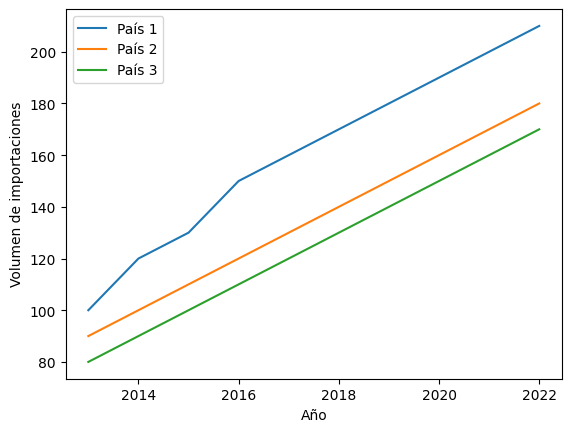

In [8]:
# GRAPHS (analisis_origenes)
import matplotlib.pyplot as plt

# Datos de ejemplo
volumenes = [[100, 120, 130, 150, 160, 170, 180, 190, 200, 210],
             [90, 100, 110, 120, 130, 140, 150, 160, 170, 180],
             [80, 90, 100, 110, 120, 130, 140, 150, 160, 170]]

paises = ['País 1', 'País 2', 'País 3']

# Crear figura y ejes
fig, ax = plt.subplots()

# Graficar líneas para cada país
for i in range(len(volumenes)):
    ax.plot(range(2013, 2023), volumenes[i], label=paises[i])

# Configurar leyenda y etiquetas de los ejes
ax.legend()
ax.set_xlabel('Año')
ax.set_ylabel('Volumen de importaciones')

plt.show()


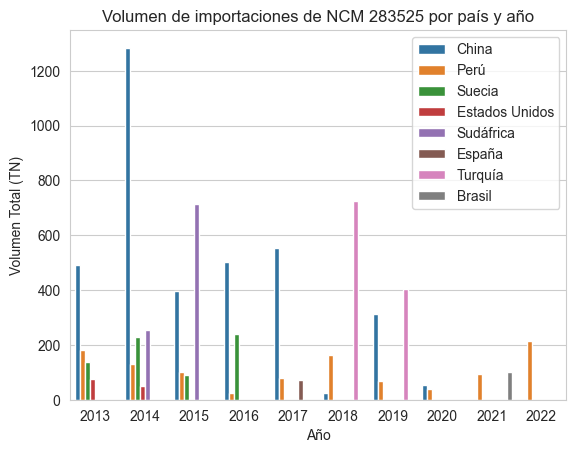

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# # Filtrar datos por NCM
# df_ncm = df[df['NCM']==283525]


# Gráfico de barras agrupado por país
sns.barplot(x='Año', y='Volumen Total (TN)', hue='Pais', data=analisis_origenes)

# Título del gráfico
plt.title('Volumen de importaciones de NCM 283525 por país y año')
plt.legend(loc='upper right')

# Mostrar gráfico
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


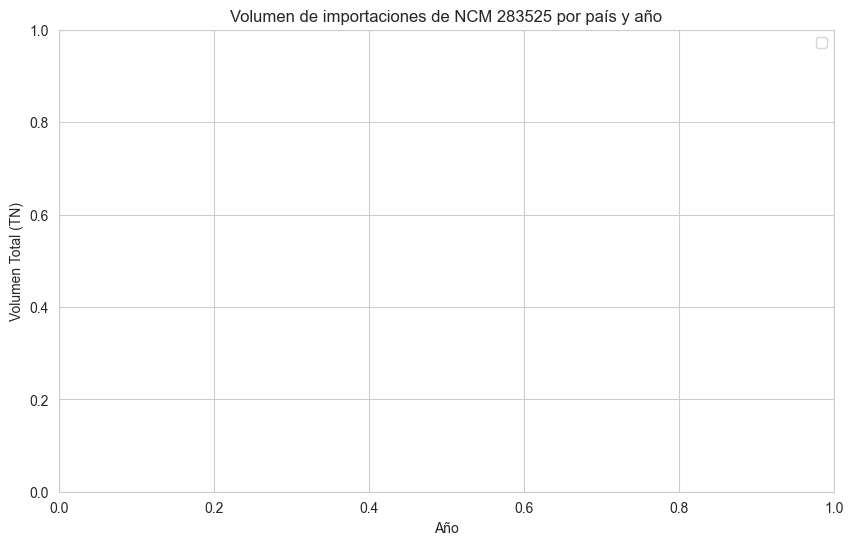

In [10]:
# Filtrar datos por NCM y agrupar por país
df_ncm_pais = analisis_origenes[analisis_origenes['NCM']==283525].groupby('Pais')

# Gráfico de línea por país
fig, ax = plt.subplots(figsize=(10,6))
for pais, data in df_ncm_pais:
    ax.plot(data['Año'], data['Volumen Total (TN)'], label=pais)

# Título del gráfico y etiquetas de los ejes
ax.set_title('Volumen de importaciones de NCM 283525 por país y año')
ax.set_xlabel('Año')
ax.set_ylabel('Volumen Total (TN)')

# Leyenda del gráfico
ax.legend()

# Mostrar gráfico
plt.show()